<AxesSubplot:>

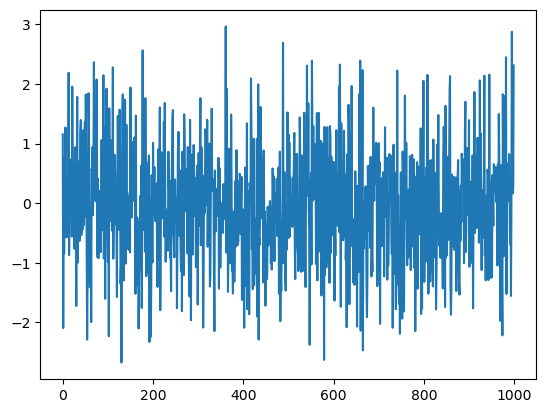

In [1]:
# 정상성 데이터 중 하나인 "화이트 노이즈" 패턴을 python으로 구현해보자

from random import gauss
from random import seed
from pandas import Series
import matplotlib.pyplot as plt

# 화이트 노이즈 생성
whiteNoise = [gauss(0.0, 1.0) for i in range(1000)] #평균이 0, 표준편차가 1인 정규분포 안에서 랜덤으로 화이트 노이즈를 생성
whiteNoise = Series(whiteNoise) # 데이터 타입을 시리즈로 변환

# 화이트 노이즈 시각화
whiteNoise.plot()

In [3]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [6]:
kospi = pd.read_csv('data/kospi_data.csv')['Close']                               

0         123.60
1         123.50
2         120.60
3         120.70
4         119.30
          ...   
11019    2477.26
11020    2481.03
11021    2426.89
11022    2450.93
11023    2472.05
Name: Close, Length: 11024, dtype: float64

C:\Users\Kyeul\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\Kyeul\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


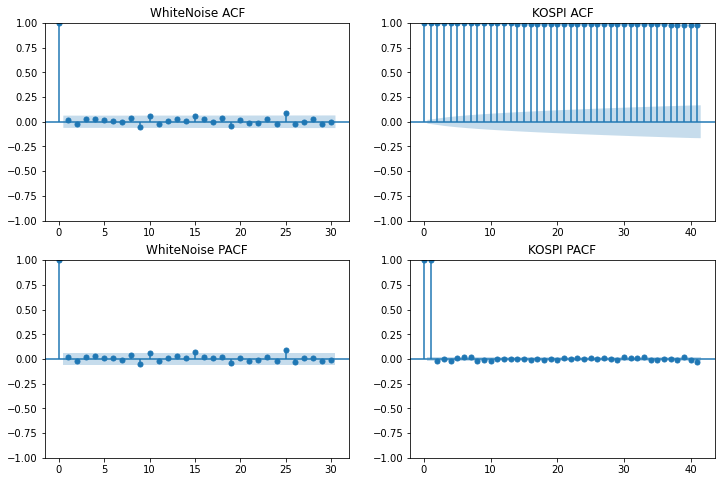

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

plot_acf(whiteNoise, ax=ax[0,0], title="WhiteNoise ACF")
plot_acf(kospi, ax=ax[0,1], title="KOSPI ACF")
plot_pacf(whiteNoise, ax=ax[1,0], title="WhiteNoise PACF")
plot_pacf(kospi, ax=ax[1,1], title="KOSPI PACF")
plt.show()

In [67]:
import re
import numpy as np

In [139]:
electricity = pd.read_csv("data/electricity_consumption.csv", encoding='cp949', index_col='날짜')

In [140]:
electricity

,1시,2시,3시,4시,5시,6시,7시,8시,9시,10시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
날짜,,,,,,,,,,,,,,,,,,,,,
2021-01-01,64942,62593,60905,59889,59638,59936,60193,59982,59626,57904,...,56691,58299,60425,62931,64176,63645,62754,61561,61979,63055
2021-01-02,60658,58603,57309,56663,56733,57327,58378,59285,60669,59515,...,55493,57865,61407,64223,65082,64257,62981,61686,61962,64227
2021-01-03,61992,59723,58310,57599,57518,58073,58877,59373,59434,56835,...,59465,61355,63202,65426,66473,65646,64815,63289,63706,64480
2021-01-04,62078,60011,58936,58715,59233,61081,64908,71659,80766,82796,...,81315,81431,82840,81666,78838,75717,72867,69726,68460,70327
2021-01-05,67267,64957,63471,63136,63564,65045,68221,73685,81609,83240,...,81611,82647,84497,83721,81513,78460,75423,72053,70992,72838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,66465,64473,63140,62540,63122,65025,69117,76487,86054,87590,...,88435,89654,90708,88653,85067,81527,78245,74696,73048,74217
2021-12-28,71059,68940,67701,67076,67184,68598,72033,78270,86809,88717,...,87226,87627,88077,85978,83052,80011,77035,73589,71856,72875
2021-12-29,69651,67276,65941,65136,65534,66910,70309,75972,84106,85966,...,82446,82500,83608,82009,79711,77646,75511,72342,70829,71882


In [79]:
type(electricity.index.to_list()[0])

str

In [80]:
# 월별 계산을 위해 MONTH column을 만들자
def expectMonth(string):
    return re.findall("[0-9]+", string)[1]
electricity['month'] = electricity.index.to_series().apply(expectMonth)

In [81]:
electricity.tail()

,1시,2시,3시,4시,5시,6시,7시,8시,9시,10시,...,16시,17시,18시,19시,20시,21시,22시,23시,24시,month
날짜,,,,,,,,,,,,,,,,,,,,,
2021-12-27,66465,64473,63140,62540,63122,65025,69117,76487,86054,87590,...,89654,90708,88653,85067,81527,78245,74696,73048,74217,12
2021-12-28,71059,68940,67701,67076,67184,68598,72033,78270,86809,88717,...,87627,88077,85978,83052,80011,77035,73589,71856,72875,12
2021-12-29,69651,67276,65941,65136,65534,66910,70309,75972,84106,85966,...,82500,83608,82009,79711,77646,75511,72342,70829,71882,12
2021-12-30,68581,66406,65155,64639,65121,66804,70225,75906,83494,83012,...,83044,84564,82901,80604,78216,76176,73142,71610,72472,12
2021-12-31,69373,67187,65955,65431,65798,67226,70163,75036,81748,81729,...,74401,75972,75798,74578,72976,71602,69383,68874,70123,12


<AxesSubplot:xlabel='month'>

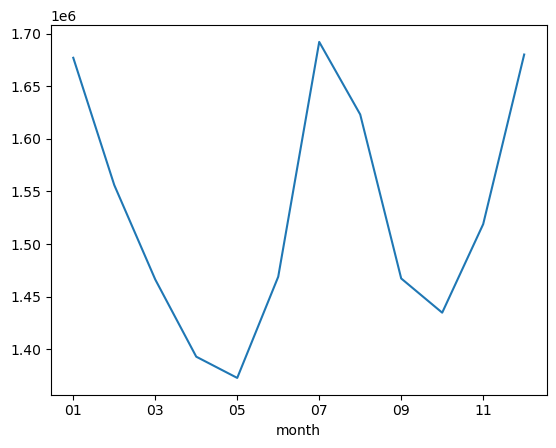

In [82]:
mean_elect = electricity.groupby('month').mean()
mean_elect.sum(axis=1).plot()

<AxesSubplot:xlabel='month'>

C:\Users\kyeul\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


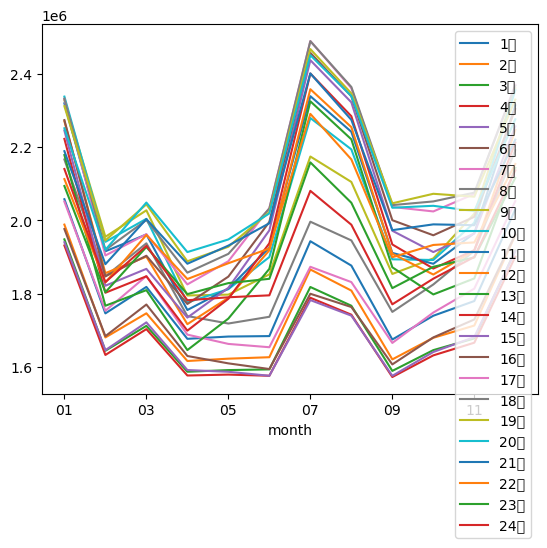

In [92]:
month_elec=electricity.groupby('month').sum()

In [98]:
month_elec = month_elec.transpose()
month_elec.head()

month,01,02,03,04,05,06,07,08,09,10,11,12
1시,2057549,1745968,1818217,1676538,1682765,1684008,1942924,1876398,1674680,1739527,1779668,2030059
2시,1988293,1680324,1746168,1616019,1622372,1626347,1865796,1808211,1620402,1679330,1712773,1959339
3시,1948001,1643969,1711962,1586685,1591216,1593119,1817988,1766858,1588988,1645715,1677620,1917487
4시,1931287,1632516,1703040,1576442,1578924,1575713,1788605,1742461,1572293,1631383,1665970,1900635
5시,1940244,1645553,1721495,1591340,1586577,1575707,1782284,1739789,1575584,1640627,1681321,1915934


In [121]:
month_elec.iloc[:,0]

1시     2057549
2시     1988293
3시     1948001
4시     1931287
5시     1940244
6시     1976173
7시     2051103
8시     2166104
9시     2328086
10시    2337643
11시    2319308
12시    2270673
13시    2178117
14시    2222242
15시    2245022
16시    2273508
17시    2330747
18시    2332042
19시    2311580
20시    2251200
21시    2188706
22시    2112476
23시    2093635
24시    2140033
Name: 01, dtype: int64

In [130]:
listMonthElect = []
for i in range(len(month_elec.columns)):
    
    listMonthElect+=(month_elec.iloc[:,i].to_list())

seriesMonthElect = pd.Series(listMonthElect)
seriesMonthElect.plot()

In [141]:
# 연중 시간별 변화량
elecTrans = electricity.transpose()
listElect = []
for i in range(len(elecTrans.columns)):
    
    listElect+=(elecTrans.iloc[:,i].to_list())

seriesElect = pd.Series(listElect, )
seriesElect.head(25)

0     64942
1     62593
2     60905
3     59889
4     59638
5     59936
6     60193
7     59982
8     59626
9     57904
10    57604
11    56869
12    56191
13    56424
14    56691
15    58299
16    60425
17    62931
18    64176
19    63645
20    62754
21    61561
22    61979
23    63055
24    60658
dtype: int64

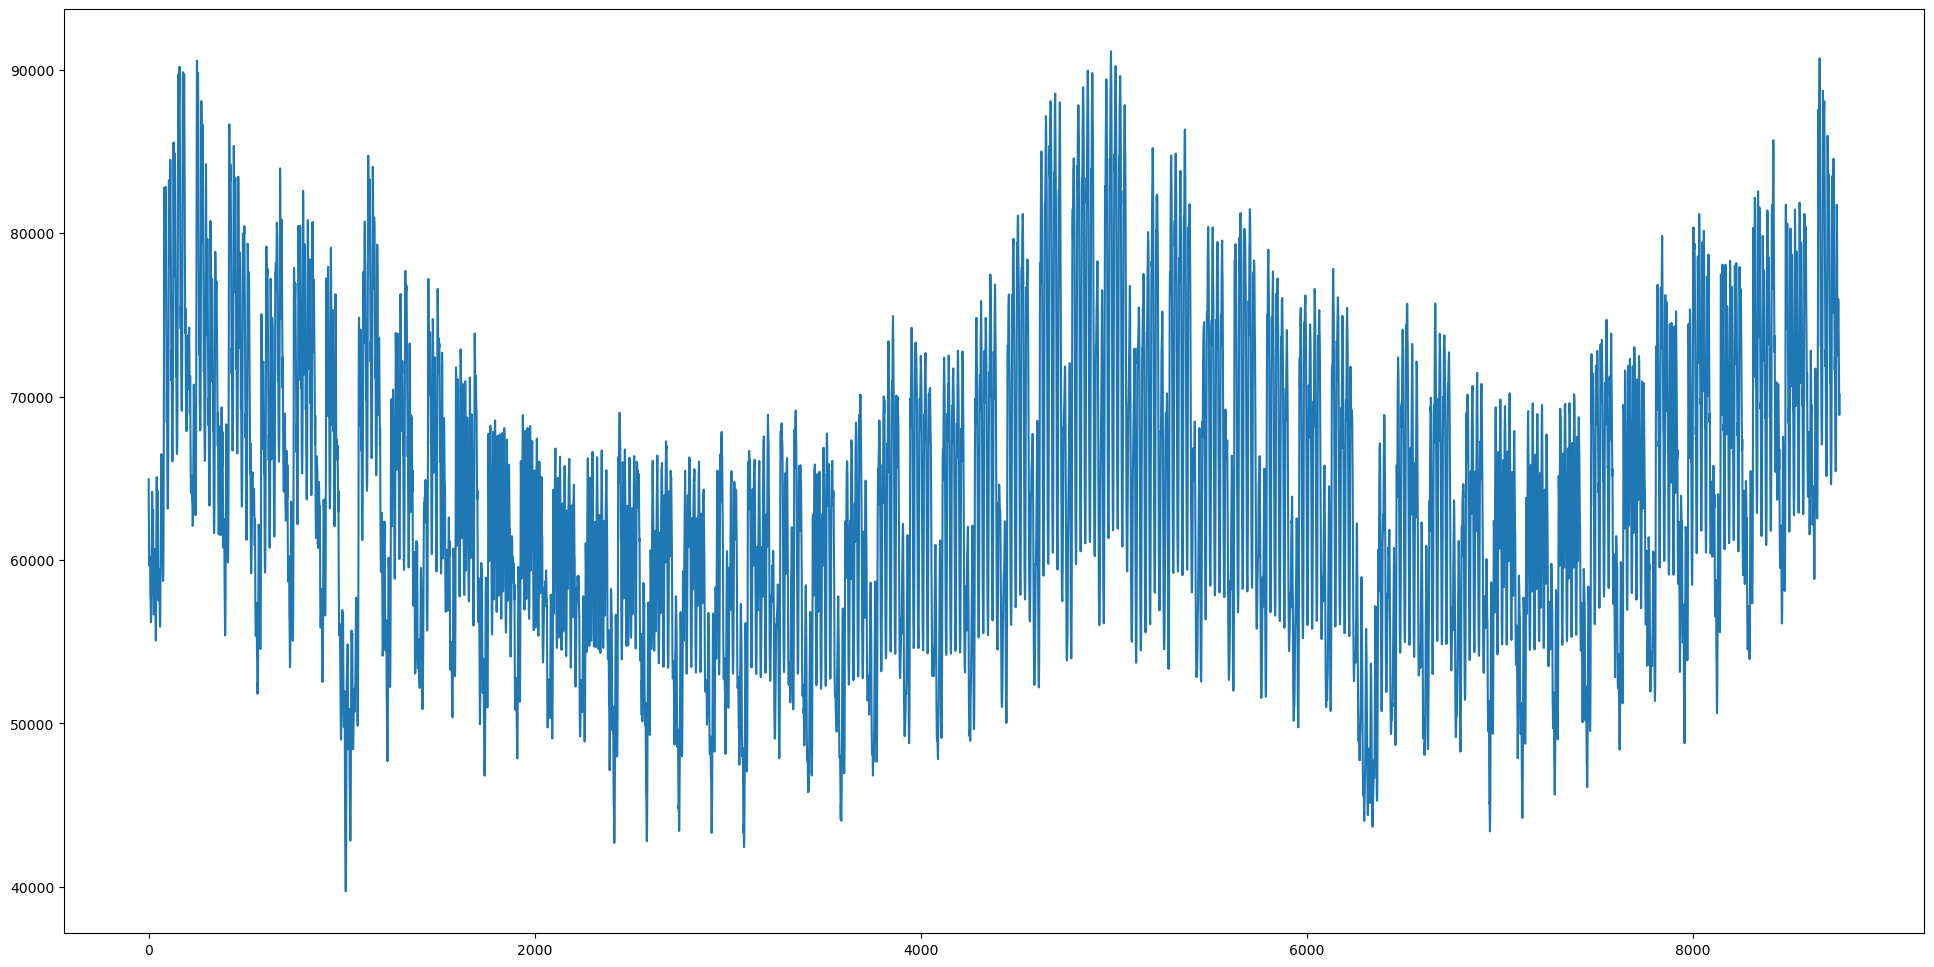

In [147]:
plt.figure(figsize=(24, 12))
seriesElect.plot()
plt.show()

<Figure size 1200x400 with 0 Axes>

C:\Users\kyeul\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


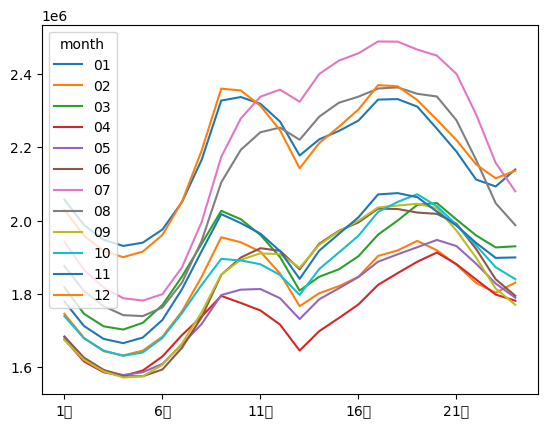

In [89]:
plt.figure(figsize=(12, 4))

electricity.groupby('month').sum().transpose().plot()
plt.show()

In [71]:
datalist = []
arr_elect = np.array(datalist.append(electricity))
arr_elect = arr_elect.reshape(1,)

In [74]:
datalist.append(electricity)

# 코스피 차분

<AxesSubplot:>

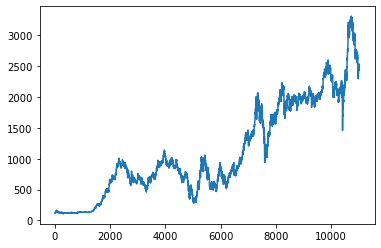

In [40]:
kospi.plot()

In [54]:
kospi = kospi[-672:]

<AxesSubplot:>

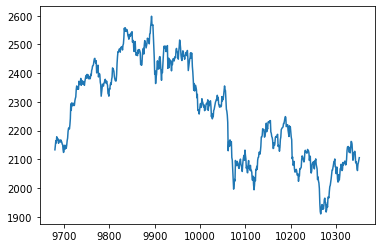

In [57]:
kospi.plot()

In [55]:
diff_1_kospi = kospi.diff(1)

<AxesSubplot:>

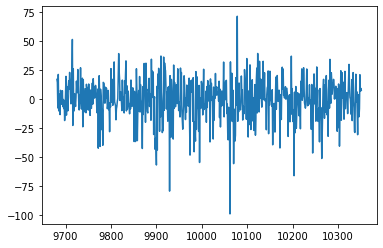

In [56]:
diff_1_kospi.plot()

In [59]:
diff_2_kospi = diff_1_kospi.diff(1)

<AxesSubplot:>

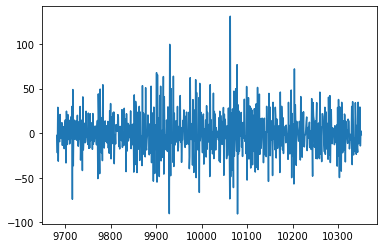

In [60]:
diff_2_kospi.plot()

C:\Users\Kyeul\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


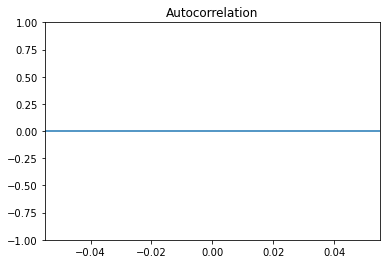

In [58]:
plot_acf(diff_1_kospi)
plt.show()

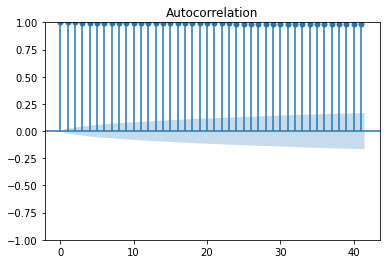

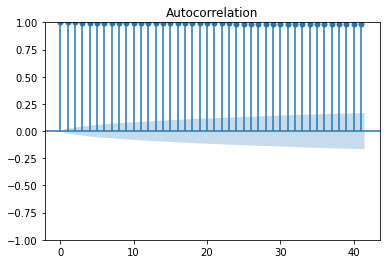

In [44]:
plot_acf(kospi)

# 김정현 노트북 코드

(1) 
```주기와 계절성 차이
1. 발생하는 기간 : 계절성은 1년 안에서 규칙적으로, 주기는 불규칙하지만 2~10년 등 매우 다양
2. 영향 : 계절성의 변동폭보다, 주기의 변동폭이 훨씬 크다.
```

>> 1년 안에 규칙이란 조건은 굳이 필요 없을 것 같다. 가령 계절성 패턴을 보려면 최소 2년 이상은 되어야 계절성 패턴의 반복을 확인할 수 있기 때문.

(2)
```
 Cycle은 불규칙적이며 장기적인 기간동안 증가하거나 감소하는 흐름을 의미하므로, 겹치는 부분이 존재한다.```
 
 Cycle이 
